### Imports and definitions

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from helpers.SimulationAnalysis import SimulationAnalysis, iterTrees, readHlist

path_to_data = 'datafiles/elvis/'
fields = ['scale','id', 'upid', 'pid', 'mvir', 'rvir', 'vmax', 'vpeak', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'M200c', 'depth_first_id','scale_of_last_MM']

h = 0.7

### Load data

In [28]:
sim = SimulationAnalysis(trees_dir=path_to_data+'RJ/trees')
halos = readHlist(path_to_data+'RJ/hlist_1.00000.list', fields)

### Load main branch of M31 and MW halos

In [29]:
#need to fix hard-coded index for Thelma & Louise
tree_M31 = sim.load_main_branch(halos[0]['id'])
tree_M31

array([(1.     , 91552628, 46, -1, 7.241e+11, 215.779,  8.723, 43.94323, 43.63397, 45.33267, 182.95),
       (0.99984, 91384715, 57, -1, 7.241e+11, 215.779,  8.721, 43.94346, 43.63414, 45.33279, 182.95),
       (0.99968, 91214313, 21, -1, 7.242e+11, 215.784,  8.714, 43.9437 , 43.63431, 45.33292, 182.94),
       (0.99952, 91042398, 19, -1, 7.242e+11, 215.788,  7.443, 43.94392, 43.63448, 45.33304, 182.93),
       (0.99936, 90869118, 22, -1, 7.236e+11, 215.732,  8.731, 43.94416, 43.63465, 45.33316, 182.93),
       (0.9992 , 90694738, 18, -1, 7.241e+11, 215.775,  7.449, 43.94439, 43.63483, 45.33327, 182.93),
       (0.99905, 90519353, 14, -1, 7.239e+11, 215.756,  7.445, 43.94461, 43.63501, 45.33339, 182.94),
       (0.99888, 90343088, 19, -1, 7.237e+11, 215.743,  7.443, 43.94484, 43.63517, 45.33351, 182.94),
       (0.99873, 90165989, 23, -1, 7.239e+11, 215.754,  7.462, 43.94507, 43.63535, 45.33361, 182.94),
       (0.99857, 89986388, 10, -1, 7.241e+11, 215.782,  8.721, 43.9453 , 43.63552,

In [9]:
#need to fix hard-coded index for Thelma & Louise
tree_MW = sim.load_main_branch(halos[1]['id'])
tree_MW

array([(1.     , 91444084, 65, -1, 6.215e+11, 205.067, 11.97 , 43.41844, 43.59055, 45.11309, 160.09),
       (0.99984, 91275679, 38, -1, 6.217e+11, 205.085, 11.982, 43.41853, 43.59076, 45.11314, 160.08),
       (0.99968, 91104905, 25, -1, 6.215e+11, 205.07 , 11.374, 43.41864, 43.59095, 45.11319, 160.07),
       (0.99952, 90932697, 17, -1, 6.214e+11, 205.049, 11.972, 43.41873, 43.59114, 45.11323, 160.06),
       (0.99936, 90759181, 17, -1, 6.214e+11, 205.057, 11.375, 43.41883, 43.59134, 45.11329, 160.06),
       (0.9992 , 90584569, 14, -1, 6.215e+11, 205.06 , 11.982, 43.41891, 43.59152, 45.11334, 160.04),
       (0.99905, 90408955, 13, -1, 6.214e+11, 205.055, 11.385, 43.41901, 43.59171, 45.11339, 160.03),
       (0.99888, 90232475,  9, -1, 6.214e+11, 205.058, 11.392, 43.41911, 43.59192, 45.11345, 160.02),
       (0.99873, 90055177, 11, -1, 6.214e+11, 205.048, 11.378, 43.41921, 43.59211, 45.1135 , 160.01),
       (0.99857, 89876989,  7, -1, 6.212e+11, 205.025, 11.381, 43.4193 , 43.5923 ,

### Load main branches of field and subhalos

In [10]:
#remove M31 and MW and apply resolution cut
halos = halos[2:]
halos = halos[halos['vpeak']>15]

print('{} halos before distance cut'.format(len(halos)))

#apply distance cut
dist_from_MW = np.sqrt((tree_MW[0]['x']-halos['x'])**2+(tree_MW[0]['y']-halos['y'])**2+(tree_MW[0]['z']-halos['z'])**2)
halos = halos[np.logical_and(300<1000.*dist_from_MW/h,1000.*dist_from_MW/h<2000)]

print('{} halos after distance cut'.format(len(halos)))

841 halos before distance cut
300 halos after distance cut


In [11]:
#this cell can take a while if the number of halos is large but it's not bad for 300 ...
halo_main_branches = []

for halo in halos:
    test = sim.load_main_branch(halo['id'])
    halo_main_branches.append(test)

In [26]:
b = halo_main_branches[1]
print(b['upid'])
print(tree_MW['id'])

[91531950 91363953 91193496 91021535 90848229 90673821 90498403 90322117
 90144995 89965727 89788947 89610722 89431250 89250557 89068915 88886196
 88702752 88518604 88332979 88147910 87963091 87778868 87594549 87410075
 87225554 87040967 86856199 86671266 86486048 86300952       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1       -1       -1       -1
       -1       -1       -1       -1       -1      

In [25]:
isin = np.isin(b['upid'], tree_M31['id'])
print(len(isin))
print(isin)

598
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False Fals

### Get peak and accretion properties

In [12]:
rvir_peak = np.zeros(len(halos))
a_rvir_peak = np.zeros(len(halos))

rvir_acc = np.zeros(len(halos))
a_rvir_acc = np.zeros(len(halos))

M31_indices = np.zeros(len(halos))
MW_indices = np.zeros(len(halos))

for i in range(len(halos)):
    rvir_peak[i] = np.max(halo_main_branches[i]['rvir'])
    a_rvir_peak[i] = halo_main_branches[i]['scale'][np.argmax(halo_main_branches[i]['rvir'])]
    if np.isin(True,np.isin(halo_main_branches[i]['upid'],tree_M31['id'])):
        temp_mb = halo_main_branches[i][np.isin(halo_main_branches[i]['upid'],tree_M31['id'])]
        rvir_acc[i] = temp_mb['rvir'][-1]
        a_rvir_acc[i] = temp_mb['scale'][-1]
        M31_indices[i] = 1
    elif np.isin(True,np.isin(halo_main_branches[i]['upid'],tree_MW['id'])):
        temp_mb = halo_main_branches[i][np.isin(halo_main_branches[i]['upid'],tree_MW['id'])]
        rvir_acc[i] = temp_mb['rvir'][-1]
        a_rvir_acc[i] = temp_mb['scale'][-1]
        MW_indices[i] = 1
    else:
        rvir_acc[i] = rvir_peak[i]
        a_rvir_acc[i] = a_rvir_peak[i]

In [37]:
print('% of halos ever within M31 virial radius: {}'.format(100.*np.sum(M31_indices)/(1.*len(M31_indices))))
print('% of halos ever within MW virial radius: {}'.format(100.*np.sum(MW_indices)/(1.*len(MW_indices))))

% of halos ever within M31 virial radius: 38.6666666667
% of halos ever within MW virial radius: 5.66666666667


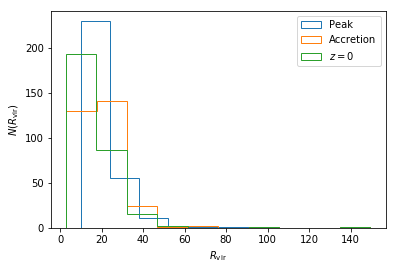

In [33]:
plt.hist(rvir_peak,histtype='step',label='Peak')
plt.hist(rvir_acc,histtype='step',label='Accretion')
plt.hist(halos['rvir'],histtype='step',label=r'$z=0$')

plt.legend(loc=1)

plt.xlabel(r'$R_{\mathrm{vir}}$')
plt.ylabel(r'$N(R_{\mathrm{vir}})$')

plt.show()